**Importing required libraries**


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models,datasets
import matplotlib.pyplot as plt

**Loading the data**

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Normalization**

In [5]:
#normalize the data
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

**Qualitative analysis of input data**

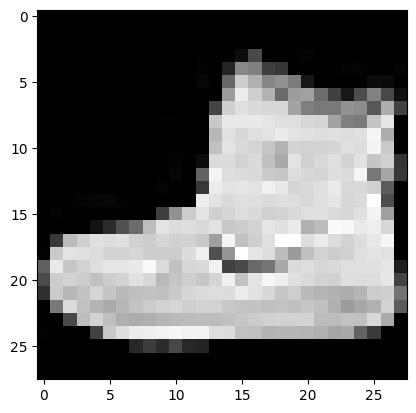

In [4]:
idx=0
plt.imshow(x_train[idx], cmap='grey')
plt.show()

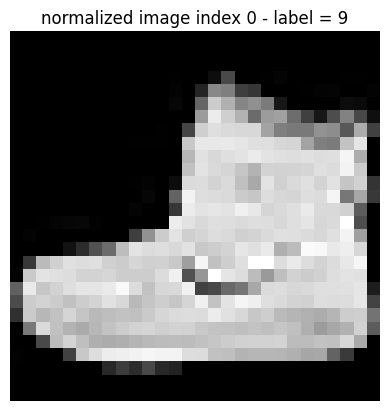

pixel values: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.0

In [9]:
plt.imshow(x_train[idx], cmap='grey')
plt.title(f"normalized image index {idx} - label = {y_train[idx]}")
plt.axis("off")
plt.show()

print("pixel values:", x_train[idx][0:10])

In [11]:
x_train.shape

(60000, 28, 28)

**Flattening (Reshaping) of input data**

In [12]:
x_train_f=x_train.reshape(-1, 28*28)
x_test_f=x_test.reshape(-1,28*28)

In [14]:
x_train_f.shape

(60000, 784)

In [16]:
x_train_f[0][:15]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

**Building Artificial Neural Network**

In [27]:
model=models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Model Compilation**



In [21]:
#compile
model.compile( optimizer='adam',
              loss=['sparse_categorical_crossentropy'],
               metrics=['accuracy'])

**Model Training (Fitting the Model)**

In [22]:
history=model.fit(x_train_f, y_train, epochs=10, validation_data=(x_test_f, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7792 - loss: 0.6245 - val_accuracy: 0.8389 - val_loss: 0.4307
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8626 - loss: 0.3725 - val_accuracy: 0.8649 - val_loss: 0.3761
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8749 - loss: 0.3371 - val_accuracy: 0.8578 - val_loss: 0.3979
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8838 - loss: 0.3120 - val_accuracy: 0.8624 - val_loss: 0.3955
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8869 - loss: 0.2963 - val_accuracy: 0.8751 - val_loss: 0.3519
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8955 - loss: 0.2781 - val_accuracy: 0.8761 - val_loss: 0.3483
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8991 - loss: 0.2677 - val_accuracy: 0.8789 - val_loss: 0.3384
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9057 - loss: 0.2526 - 

**Model Evaluation (Testing the Model)**

In [23]:
test_loss, test_acc=model.evaluate(x_test_f, y_test, verbose=2)
print(test_loss)

313/313 - 1s - 3ms/step - accuracy: 0.8789 - loss: 0.3434
0.3434358835220337


**Model predictions**

In [24]:
predictions=model.predict(x_test_f)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


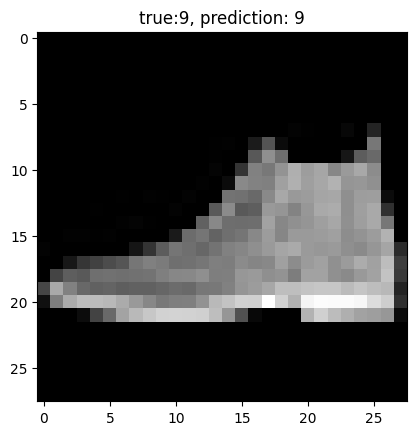

In [26]:
plt.imshow(x_test_f[0].reshape(28,28), cmap='gray')
plt.title(f"true:{y_test[0]}, prediction: {predictions[0].argmax()}")
plt.show()